<a name="toc_15456_1.1"></a>
## 1.1 Goals
- To make a Regression analysis for the inputs: R&D spend, Administration spend, Marketing spend and the output : Profit.

- To find the Profit when R&D spend, Marketing spend, and Administration spend is random

In [55]:
import copy, math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

In [56]:
X_train = np.array([
    [165349.3, 136897.9, 471784.2],
    [162597.8, 151377.69, 443898.63],
    [153441.61, 101145.65, 407934.64],
    [144372.51, 118671.95, 383199.72],
    [142107.44, 91391.87, 366168.52],
    [131877, 99814.81, 362861.46],
    [134615.56, 147198.97, 127716.92],
    [130298.23, 145530.16, 323876.78],
    [120542.62, 148719.05, 311613.39],
    [123334.98, 108679.27, 304981.72],
    [101913.18, 110594.21, 229161.05],
    [100672.06, 91790.71, 249744.65],
    [93863.85, 127320.48, 249839.54],
    [91992.49, 135495.17, 252665.03],
    [119943.34, 156547.52, 256513.02],
    [114523.71, 122616.94, 261776.33],
    [78013.21, 121597.65, 264346.16],
    [94657.26, 145077.68, 282574.41],
    [91749.26, 114175.89, 294919.67],
    [86419.8, 153514.21, 0.1],
    [76253.96, 113867.4, 298664.57],
    [78389.57, 153773.53, 299737.39],
    [73994.66, 122782.85, 303319.36],
    [67532.63, 105751.13, 304768.83],
    [77044.11, 99281.44, 140574.91],
    [64664.81, 139553.26, 137962.72],
    [75328.97, 144136.08, 134050.17],
    [72107.7, 127864.65, 353183.91],
    [66051.62, 182645.66, 118148.3],
    [65605.58, 153032.16, 107138.48],
    [61994.58, 115641.38, 91131.34],
    [61136.48, 152702.02, 88218.33],
    [63408.96, 129219.71, 46085.35],
    [55494.05, 103057.59, 214634.91],
    [46426.17, 157694.02, 210797.77],
    [46014.12, 85047.54, 205517.74],
    [28663.86, 127056.31, 201126.92],
    [44070.05, 51283.24, 197029.52],
    [20229.69, 65948.03, 185265.2],
    [38558.61, 82982.19, 174999.4],
    [28754.43, 118546.15, 172795.77],
    [27893.02, 84710.87, 164470.81],
    [23641.03, 96189.73, 148001.21],
    [15505.83, 127382.4, 35534.27],
    [22177.84, 154806.24, 28334.82],
    [1000.33, 124153.14, 1904.03],
    [1315.56, 115816.31, 297114.56],
    [0.1, 135427.02, 0.1],
    [542.15, 51743.25, 0.1],
    [0.1, 116983.9, 45173.16]
])
y_train = np.array([
    192261.93,
    191792.16,
    191050.49,
    182902.09,
    166188.04,
    156991.22,
    156122.61,
    155752.7,
    152211.87,
    149760.06,
    146122.05,
    144259.5,
    141585.62,
    134307.45,
    132602.75,
    129917.14,
    126993.03,
    125370.47,
    124267,
    122776.96,
    118474.13,
    111313.12,
    110352.35,
    108734.09,
    108552.14,
    107404.44,
    105733.64,
    105008.41,
    103282.48,
    101004.74,
    99937.69,
    97483.66,
    97427.94,
    96779.02,
    96712.9,
    96479.61,
    90708.29,
    89949.24,
    81229.16,
    81005.86,
    78240.01,
    77798.93,
    71498.59,
    69759.08,
    65200.43,
    64926.18,
    49490.85,
    42559.83,
    35673.51,
    14681.5
])

In [57]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (50, 3), X Type:<class 'numpy.ndarray'>)
[[1.65e+05 1.37e+05 4.72e+05]
 [1.63e+05 1.51e+05 4.44e+05]
 [1.53e+05 1.01e+05 4.08e+05]
 [1.44e+05 1.19e+05 3.83e+05]
 [1.42e+05 9.14e+04 3.66e+05]
 [1.32e+05 9.98e+04 3.63e+05]
 [1.35e+05 1.47e+05 1.28e+05]
 [1.30e+05 1.46e+05 3.24e+05]
 [1.21e+05 1.49e+05 3.12e+05]
 [1.23e+05 1.09e+05 3.05e+05]
 [1.02e+05 1.11e+05 2.29e+05]
 [1.01e+05 9.18e+04 2.50e+05]
 [9.39e+04 1.27e+05 2.50e+05]
 [9.20e+04 1.35e+05 2.53e+05]
 [1.20e+05 1.57e+05 2.57e+05]
 [1.15e+05 1.23e+05 2.62e+05]
 [7.80e+04 1.22e+05 2.64e+05]
 [9.47e+04 1.45e+05 2.83e+05]
 [9.17e+04 1.14e+05 2.95e+05]
 [8.64e+04 1.54e+05 1.00e-01]
 [7.63e+04 1.14e+05 2.99e+05]
 [7.84e+04 1.54e+05 3.00e+05]
 [7.40e+04 1.23e+05 3.03e+05]
 [6.75e+04 1.06e+05 3.05e+05]
 [7.70e+04 9.93e+04 1.41e+05]
 [6.47e+04 1.40e+05 1.38e+05]
 [7.53e+04 1.44e+05 1.34e+05]
 [7.21e+04 1.28e+05 3.53e+05]
 [6.61e+04 1.83e+05 1.18e+05]
 [6.56e+04 1.53e+05 1.07e+05]
 [6.20e+04 1.16e+05 9.11e+04]
 [6.11e+04 1.53e+05 

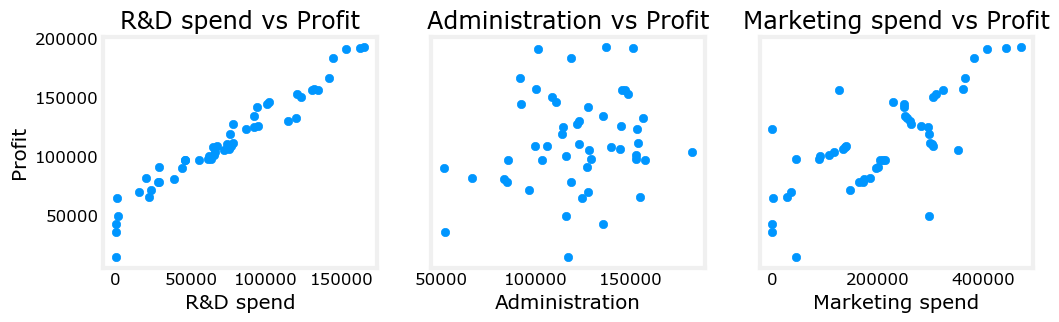

In [58]:
X_feature = ['R&D spend', 'Administration', 'Marketing spend']
titles = ['R&D spend vs Profit', 'Administration vs Profit', 'Marketing spend vs Profit']
fig, ax = plt.subplots(1,3, figsize = (12,3), sharey = True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train)
    ax[i].set_xlabel(X_feature[i])
    ax[i].set_title(titles[i])

ax[0].set_ylabel('Profit')

plt.show()

In [59]:
'''FEATURE SCALING'''

'FEATURE SCALING'

In [60]:
a = np.array([[1,2,3],[3,4,5]])
b = np.array([1,2,3])
a[0]/b

array([1., 1., 1.])

In [61]:
def z_score_normalize(X):
    std_dev = np.std(X, axis = 0)
    mean = np.mean(X, axis=0)
    m = X.shape[0]
    X_scaled = np.zeros(X.shape)
    for i in range(m):
        X_scaled[i] = (X[i]-mean)/std_dev
    
    return X_scaled, std_dev, mean

In [62]:
X_scale, stdev, mu = z_score_normalize(X_train)
X_scale

array([[ 2.02e+00,  5.61e-01,  2.15e+00],
       [ 1.96e+00,  1.08e+00,  1.92e+00],
       [ 1.75e+00, -7.28e-01,  1.63e+00],
       [ 1.55e+00, -9.64e-02,  1.42e+00],
       [ 1.50e+00, -1.08e+00,  1.28e+00],
       [ 1.28e+00, -7.76e-01,  1.25e+00],
       [ 1.34e+00,  9.32e-01, -6.88e-01],
       [ 1.25e+00,  8.72e-01,  9.32e-01],
       [ 1.03e+00,  9.87e-01,  8.31e-01],
       [ 1.09e+00, -4.57e-01,  7.76e-01],
       [ 6.20e-01, -3.88e-01,  1.50e-01],
       [ 5.93e-01, -1.07e+00,  3.20e-01],
       [ 4.43e-01,  2.15e-01,  3.21e-01],
       [ 4.02e-01,  5.10e-01,  3.44e-01],
       [ 1.02e+00,  1.27e+00,  3.76e-01],
       [ 8.98e-01,  4.59e-02,  4.19e-01],
       [ 9.44e-02,  9.12e-03,  4.40e-01],
       [ 4.61e-01,  8.56e-01,  5.91e-01],
       [ 3.97e-01, -2.58e-01,  6.93e-01],
       [ 2.79e-01,  1.16e+00, -1.74e+00],
       [ 5.57e-02, -2.70e-01,  7.24e-01],
       [ 1.03e-01,  1.17e+00,  7.33e-01],
       [ 6.01e-03,  5.18e-02,  7.62e-01],
       [-1.36e-01, -5.62e-01,  7.7

In [63]:
X_minimum = np.min(X_scale, axis =0)
X_minimum

array([-1.62, -2.53, -1.74])

In [64]:
X_maximum = np.max(X_scale, axis = 0)
X_maximum

array([2.02, 2.21, 2.15])

In [65]:
b_init = 10000
w_init = np.array([2000,2000,2000])


In [66]:
def compute_cost(X, y, w, b):
    m = len(y)
    j = 0
    for i in range(m):
        j += (np.dot(w,X[i]) + b - y[i])**2

    j /= 2*m
    return j
#     m = X.shape[0]
#     cost = 0.0
#     for i in range(m):                                
#         f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
#         cost = cost + (f_wb_i - y[i])**2       #scalar
#     cost = cost / (2 * m)                      #scalar    
#     return cost

In [67]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_scale, y_train, w_init, b_init)
print(f'Cost at init w : {cost}')

Cost at init w : 5855753377.614135


In [68]:
def compute_gradient(X, y, w, b): 
    
    dj_dw = np.zeros(X.shape[1])
    dj_db = 0
    m,n = X.shape
    for j in range(n):
        for i in range(m):
            dj_dw[j] += (np.dot(w,X[i])+b-y[i])*X[i,j]
            if j==0:
                dj_db += (np.dot(w,X[i])+b-y[i])
    dj_dw /= m
    dj_db /= m
    
    return dj_db, dj_dw 
    
#     m,n = X.shape           #(number of examples, number of features)
#     dj_dw = np.zeros((n,))
#     dj_db = 0.

#     for i in range(m):  # Locked the first row                           
#         err = (np.dot(X[i], w) + b) - y[i]   
#         for j in range(n):   # Iterating on all columns                      
#             dj_dw[j] = dj_dw[j] + err * X[i, j]    
#         dj_db = dj_db + err                        
#     dj_dw = dj_dw / m                                
#     dj_db = dj_db / m                                
        
#     return dj_db, dj_dw

In [69]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_scale, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -102012.73919999994
dj_dw at initial w,b: 
 [-34887.38  -5589.21 -26452.47]


<a name="toc_15456_5.2"></a>
## 5.2 Gradient Descent With Multiple Variables
The routine below implements equation (5) above.

In [70]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
 
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:.5f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In the next cell you will test the implementation. 

In [71]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 1.12
# run gradient descent 
w_norm, b_norm, J_hist = gradient_descent(X_scale, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_norm:0.2f},{w_norm} ")
m,_ = X_scale.shape
for i in range(m):
    print(f"prediction: {np.dot(X_scale[i], w_norm) + b_norm:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 810427618.10814   
Iteration  100: Cost 39724448.12099   
Iteration  200: Cost 39208975.32030   
Iteration  300: Cost 39208563.33910   
Iteration  400: Cost 39208563.00983   
Iteration  500: Cost 39208563.00957   
Iteration  600: Cost 39208563.00957   
Iteration  700: Cost 39208563.00957   
Iteration  800: Cost 39208563.00957   
Iteration  900: Cost 39208563.00957   
b,w found by gradient descent: 112012.74,[36612.43  -743.77  3296.26] 
prediction: 192521.35, target value: 192261.93
prediction: 189156.87, target value: 191792.16
prediction: 182147.38, target value: 191050.49
prediction: 173696.80, target value: 182902.09
prediction: 172139.61, target value: 166188.04
prediction: 163580.88, target value: 156991.22
prediction: 158114.20, target value: 156122.61
prediction: 160021.46, target value: 155752.7
prediction: 151741.80, target value: 152211.87
prediction: 154884.78, target value: 149760.06
prediction: 135509.12, target value: 146122.05
prediction: 135573.81,

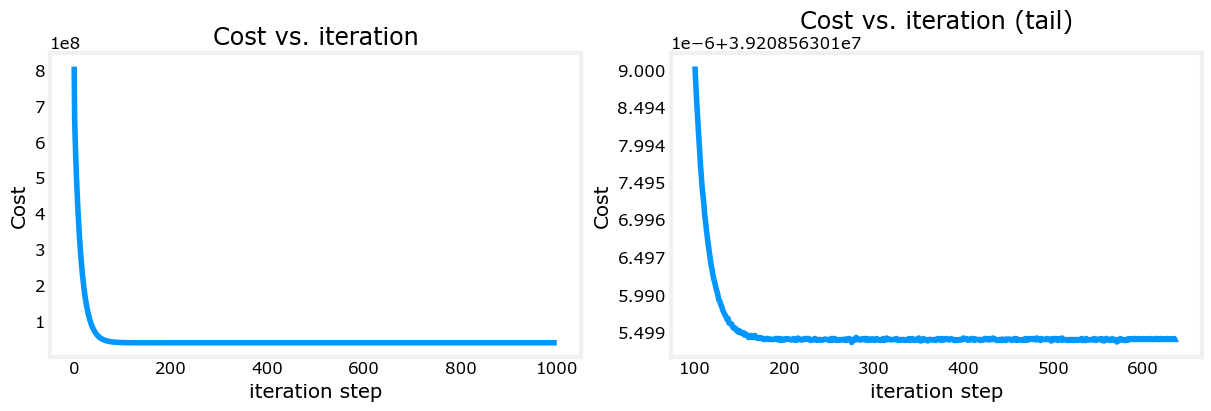

In [72]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[460:])), J_hist[460:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In reality, the prediction is a hyper plane (Because we have 3 independent variables and a dependent variable)[When each independent variable is plotted vs the dependent variable(prediction), then we would get a scattered plot like this. We will Not have lines in each plot)]. If we had only 3 variables (Both inde and de), then it would be a plane, and there would be 2 plots. If we had only 2 variables, then there is only one plot, and we would have a line.

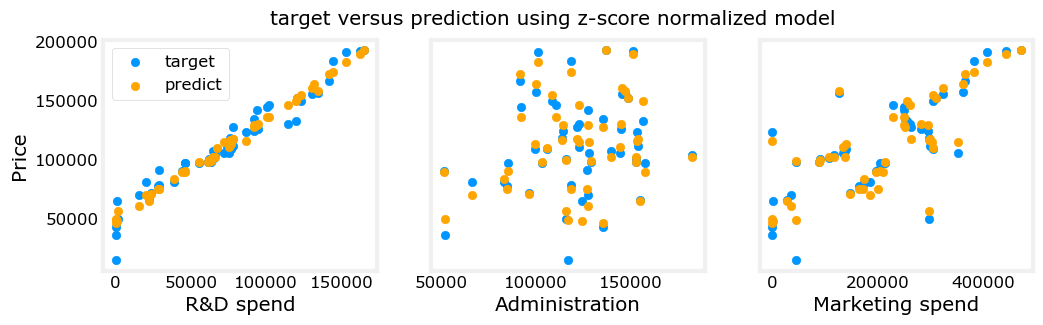

In [73]:
#predict target using normalized features
m = X_scale.shape[0]

# y prediction
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_scale[i], w_norm) + b_norm

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,3,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_feature[i])
    ax[i].scatter(X_train[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [74]:
from ipywidgets import interact, interactive, widgets
import ipywidgets

'''We want to predict the value for : 
R&D Spend = 60000, Administration = 100000, Marketing spend = 200000'''


def prediction_function(x1,x2,x3):
    X_input = np.array([x1,x2,x3])
    X_input_scale = (X_input-mu)/stdev
    prediction = X_input_scale@w_norm + b_norm

    return f'Predicted value for inputs: {x1},{x2},{x3} = {prediction}'


x1_min, x1_max = 0, 200000
x2_min, x2_max = 40000, 250000
x3_min, x3_max = 0, 500000

In [75]:
x1_slider = widgets.FloatSlider(value=100000, min=x1_min, max=x1_max, step=1, description='R&D Spend',layout={'width': '50%', 'description_width': 'initial'})
x2_slider = widgets.FloatSlider(value=145000, min=x2_min, max=x2_max, step=1, description='Admin spend', layout={'width': '50%', 'description_width': 'initial'})
x3_slider = widgets.FloatSlider(value=250000, min=x3_min, max=x3_max, step=1, description='Market spend', layout={'width': '50%', 'description_width': 'initial'})

interact(prediction_function, x1=x1_slider, x2=x2_slider, x3=x3_slider);


interactive(children=(FloatSlider(value=100000.0, description='R&D Spend', layout=Layout(width='50%'), max=200…